In [1]:
%pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.3 MB/s eta 0:00:00
  Using cached Babel-2.14.0-py3-none-any.whl.metadata (1.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 9.4 MB/s eta 0:00:00
  Using cached pycparser-2.21-py2.py3-none-any.whl (118 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/11

In [2]:
from fastbook import *
from fastcore.all import *

In [3]:
path = 'satellite_data'

In [4]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=10),
    get_y = parent_label,
    item_tfms=[Resize(256, method='crop')]
).dataloaders(path, bs=32)

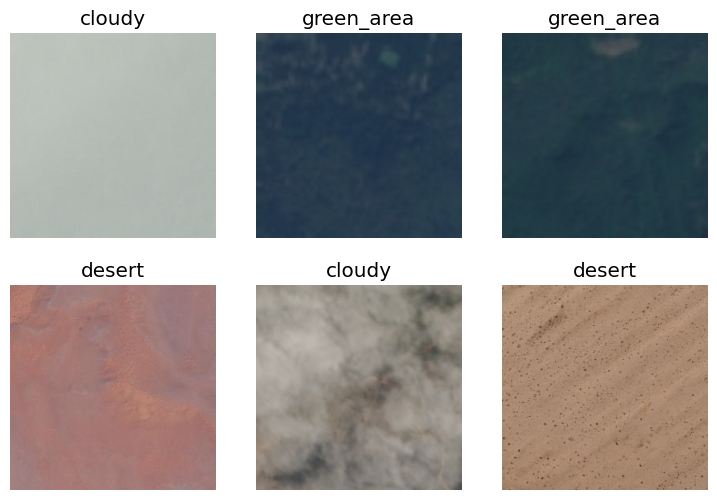

In [5]:
dls.show_batch(max_n=6)

In [10]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.148300,1.202452,0.575000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.322194,0.538351,0.800000,00:03
1,0.180098,0.375711,0.900000,00:03
2,0.130035,0.335642,0.900000,00:03


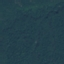

In [14]:
test_image = Image.open(f'{path}/green_area/Forest_2.jpg').to_thumb(256, 256)
test_image

In [15]:
label, _, probs = learn.predict(test_image)

print(label, _, probs)

green_area tensor(2) tensor([4.2274e-05, 7.6804e-05, 9.9945e-01, 4.3477e-04])


In [16]:
print(f"Confidence in this image being a {label}: {probs.max() * 100}%")

Confidence in this image being a green_area: 99.94461822509766%
